#ETAPE 3 : *Exploration des Données (EDA)*

###  **Chargement de la table :  Faites une copie des scripts (sur Google Colab) puis Apppliquer les scripts sur la nouvelle base de données fournie pour pratiquer**

In [ ]:
import pandas as pd
import numpy as np


# Afficher un aperçu
  # dimensions
print(df.shape)

####**Création de l'échantillon d'apprentissage, de test et de validation**

In [ ]:
# Diviser en train et test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Conversion la date d'entrée en format datetime
#df_perm['Date'] = pd.to_datetime(df['D_Entree_Def'])
df.loc[:, 'Date'] = pd.to_datetime(df['D_Entree_Def']).dt.year

# Séparation des variables explicatives et cible
X = df[df['Date'] < 2021].drop(columns='TP_flore')
y = df[df['Date'] < 2021]['TP_flore']

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test de manière stratifiée
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)



####**Identification des facteurs de risque à variance quasi-nulle**

- Analyse de la variabilité des variables continues

       💡 Objectif :
       Le procédé de variance quasi-nulle permet de repérer les facteurs de risque ayant peu de variabilité

       ✔ Une seule valeur unique (variance nulle)
       ✔ Un rapport élevé entre la modalité la plus fréquente et la seconde plus fréquente

       💡 Impact potentiel :

       ✔ Peut révéler des problèmes de qualité des données
       ✔ Peut indiquer des variables peu informatives

In [ ]:
var_f = var = ["TP_flore",
"D_Sortie_Def",
"Annee_Def",
"D_Entree_Def",
"Nbre_interven",
"Age",
"Age_financ",
"Anc_banc",
"Anc_prof",
"CSP",
"D_observation",
"Obj_bien",
"Etat_c",
"Motif_entre_ctx",
"Motif_sortie_ctx",
"Nat_financ",
"IDENTIFIANT",
"Sexe",
"Sit_fam",
"Typ_taux",
"D_Entreé_Def0",
"D_Sortie_Def0",
"D_fin_financ",
"D_Sortie_CTX",
"Indic_CTX",
"Indic_D",
"Indic_clos",
"Indic_imp",
"Mont_appor",
"Mont_chg",
"Mont_crd",
"Mont_EAD",
"Mont_EAD_Resid",
"Mont_Encours",
"Mont_Retour_S",
"Mont_rec",
"Mont_brut_pat_mob",
"Mont_net_pat_mob",
"Mont_perte_brut",
"Mont_cout_du financ",
"Mont_Rev",
"Duree_financ",
"Duree_res_financ",
"Nomb_mois_CTX",
"Nomb_mois_der_CTX",
"Nomb_pass_def",
"Nomb_pass_def_h",
"Nomb_person_ch",
"Nomb_pass_CTX",
"Indic_imp_12",
"Tx_endett",
"LTV",
"LTV88",
"LTV80",
"Duree_financ19",
"Anc_banc10",
"Anc_banc20",
"Age50",
"Duree_financ_oct19",
"TP_Brut",
"Mont_ead_entr_def",
"Duree_def",
"Duree_res_def",
"Nomb_mois_def",
"Nomb_mois_der_def",
"date_recuperation",
'Date'
   ]


Nombre de variables sélectionnées : 32 / 35


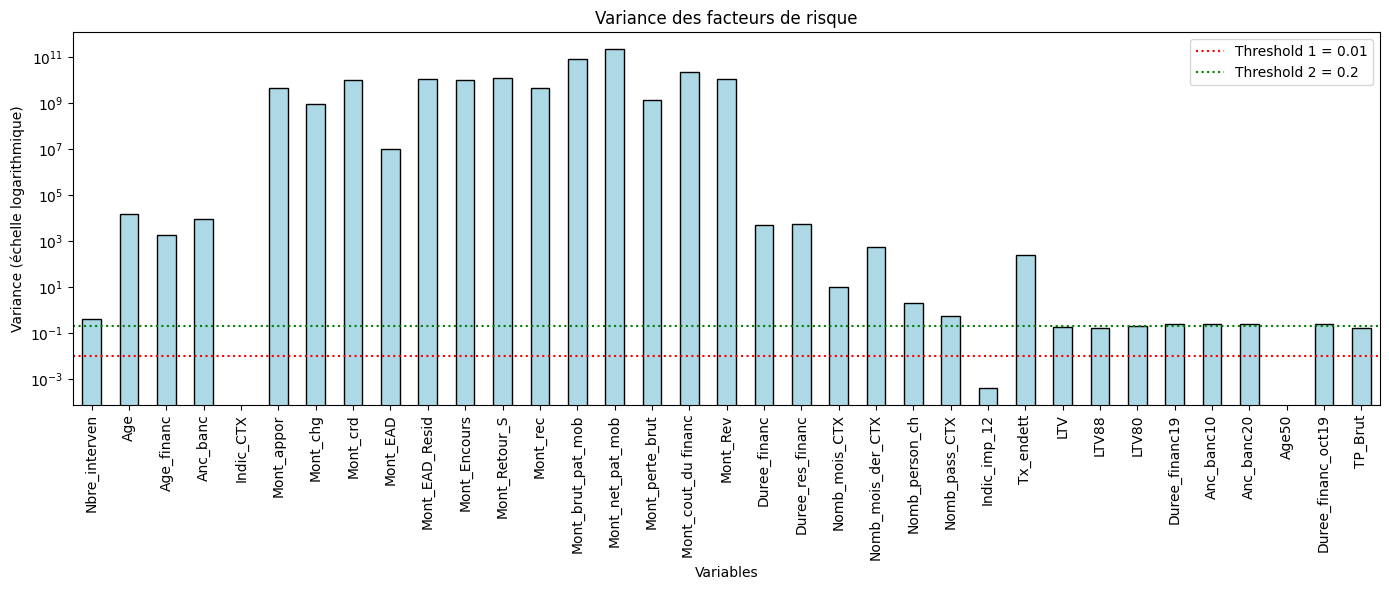

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold


# Exclure les variables spécifiques
exclude_vars = {'IDENTIFIANT', 'D_observation', 'Annee_Def', 'year_month', 'D_entree_def', 'D_sortie_def',
                'Nomb_pass_def',	'Nomb_pass_def_h', 'D_Entreé_Def0', 'D_Sortie_Def0', 'D_Entreé_Def', 'D_Sortie_Def',
                'Indic_clos', 'delai_mois',	'delai_an', 'Annee_Def', 'D_Sortie_CTX',
                'Indic_D', 'date_recuperation', 'Mont_ead_entr_def', 'Duree_def', 'Duree_res_def', 'Nomb_mois_def', 'Nomb_mois_der_def',
                "Dt_P_D_d_L", "Dt_R_CTX", "Indic_M", "Mont_f_c1", "Mont_f_c2", "Mont_f_c3", "Mont_f_c4", "Mont_f_c5", "Mont_f_c6",
                "Mont_f_c7", "Mont_f_c8", "Mont_f_c9", "Mont_f_c10", "Mont_f_c11", "Mont_f_c12", "Mont_f_c13", "Mont_f_c14", "Mont_f_c15",
                "Dt1", "Dt2", "Dt3", "Dt4", "Dt5", "Dt6", "Dt7", "Dt8", "Dt9", "Dt10", "Dt11", "Dt12", "Dt13", "Dt14", "Mont_ref_octr",
                "indic_s", "indic_pt", 'Date', 'TP_flore'

}


# Identification des variables numériques
numeric_vars = [var for var in df[var_f].select_dtypes(include=['number']).columns if var not in exclude_vars]

# Vérifier que numeric_vars contient bien des colonnes valides dans X_train
X = X_train[numeric_vars].copy()

# Calcul des variances de chaque variable
variances = X.var()

# Définition des seuils de variance
threshold1 = 0.01
threshold2 = 0.2

# Sélection des variables ayant une variance supérieure à threshold1
selector = VarianceThreshold(threshold=threshold1)
X_selected = selector.fit_transform(X)

# Extraire les noms des variables sélectionnées
selected_features = X.columns[selector.get_support(indices=True)].tolist()

# Affichage du nombre de variables sélectionnées
print(f"Nombre de variables sélectionnées : {len(selected_features)} / {X.shape[1]}")

# Tracer la variance des variables
plt.figure(figsize=(14, 6))  # Ajuster la taille de la figure

ax = pd.Series(variances, index=X.columns).plot(kind='bar', logy=True, color='lightblue', edgecolor='black')
ax.axhline(threshold1, ls='dotted', c='red', label=f'Threshold 1 = {threshold1}')
ax.axhline(threshold2, ls='dotted', c='green', label=f'Threshold 2 = {threshold2}')

plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Variance (échelle logarithmique)')
plt.title('Variance des facteurs de risque')
plt.legend()
plt.tight_layout()
plt.show()

#NDB_Mm1 : niveau de découvert bancaire

In [ ]:
X_train['Indic_imp_12'].value_counts(), X_train['Age50'].value_counts(),  X_train['Indic_CTX'].value_counts(), X_train[['Indic_imp_12', 'Indic_CTX', 'Age50']].nunique()


(Indic_imp_12
 0.0    4688
 1.0       2
 Name: count, dtype: int64,
 Age50
 1.0    25629
 Name: count, dtype: int64,
 Indic_CTX
 1.0    4690
 Name: count, dtype: int64,
 Indic_imp_12    2
 Indic_CTX       1
 Age50           1
 dtype: int64)

Nous supprimons la variable  Age50 et  Indic_CTX.

####**Description des variables quantitatives**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def analyze_numeric_variables(df):

    """
    Analyse les variables quantitatives d'une base de données :
    - Moyenne, médiane, écart type, minimum, maximum, quartiles
    - Boxplot, histogramme et QQ-plot
    """

    # Identification des variables numériques
    numer_vars = [var for var in df[var_f].select_dtypes(include=['number']).columns if var not in exclude_vars]

    # Sélection des variables numériques
    numeric_vars = X_train[numer_vars]

    # Calcul des statistiques descriptives
    stats_summary = numeric_vars.describe().T
    stats_summary['median'] = numeric_vars.median()

    print("\n📊 Statistiques descriptives des variables numériques :")
    print(stats_summary)

    # Visualisation des distributions
    for col in numeric_vars.columns:
        plt.figure(figsize=(15, 5))

        # Boxplot
        plt.subplot(1, 3, 1)
        sns.boxplot(y=numeric_vars[col], color='lightblue')
        plt.title(f'Boxplot de {col}')

        # Histogramme
        plt.subplot(1, 3, 2)
        sns.histplot(numeric_vars[col], bins=30, kde=True, edgecolor='black')
        plt.title(f'Histogramme de {col}')
        plt.xlabel(col)

        # QQ-Plot
        plt.subplot(1, 3, 3)
        stats.probplot(numeric_vars[col].dropna(), dist="norm", plot=plt)
        plt.title(f'QQ-Plot de {col}')

        plt.tight_layout()
        plt.show()

    return stats_summary


In [ ]:
stats_summary = analyze_numeric_variables(df)

####**Synthèse des résultats : Identification des variables à analyser**

    Critères pour les variables critiques :
    1. Faible variance (< variance_threshold) → À corriger ou éliminer
    2. Forte asymétrie (> skew_threshold) → À approfondir si on n'envixage pas une discrétisation
    3. Forte proportion de valeurs manquantes (> missing_threshold) → À analyser ou imputer ou supprimer
    4. Forte colinéarité avec d'autres variables (> correlation_threshold) → À approfondir ou fusionner
    5. Présence excessive de valeurs extrêmes → Approfondir

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def analyze_numeric_variables(df, X_train, variance_threshold=0.001, skew_threshold=2, missing_threshold=0.5, correlation_threshold=0.9):
    """
    Analyse les variables quantitatives d'une base de données :
    - Moyenne, médiane, écart type, minimum, maximum, quartiles
    - Identification des variables critiques à éliminer ou approfondir
    - Boxplot, histogramme et QQ-plot pour l'analyse des distributions

    Critères pour les variables critiques :
    1. Faible variance (< variance_threshold) → À éliminer
    2. Forte asymétrie (> skew_threshold) → À approfondir
    3. Forte proportion de valeurs manquantes (> missing_threshold) → À éliminer
    4. Forte colinéarité avec d'autres variables (> correlation_threshold) → À approfondir ou fusionner
    5. Présence excessive de valeurs extrêmes → À approfondir
    """


    # Sélection des variables numériques à analyser
    numeric_vars = [var for var in df[var_f].select_dtypes(include=['number']).columns if var not in exclude_vars]
    X_numeric = X_train[numeric_vars]

    # Calcul des statistiques descriptives
    stats_summary = X_numeric.describe().T
    stats_summary['median'] = X_numeric.median()
    stats_summary['missing_ratio'] = X_numeric.isnull().mean()  # Ratio de valeurs manquantes
    stats_summary['variance'] = X_numeric.var()  # Variance
    #stats_summary['skewness'] = X_numeric.skew()  # Asymétrie (Skewness)

    # Calcul de la matrice de corrélation absolue
    correlation_matrix = X_numeric.corr().abs()

    # Stockage des variables critiques sous forme de tableau
    critical_variables = []

    for col in X_numeric.columns:
        # Critère 1 : Faible variance → Éliminer
        if stats_summary.loc[col, 'variance'] < variance_threshold:
            critical_variables.append({'Variable': col, 'Critère': 'Faible variance'})

        # Critère 2 : Forte asymétrie → Approfondir
        #if abs(stats_summary.loc[col, 'skewness']) > skew_threshold:
         #   critical_variables.append({'Variable': col, 'Critère': 'Forte asymétrie'})

        # Critère 3 : Trop de valeurs manquantes → Éliminer
        if stats_summary.loc[col, 'missing_ratio'] > missing_threshold:
            critical_variables.append({'Variable': col, 'Critère': 'Trop de valeurs manquantes'})

        # Critère 4 : Forte colinéarité avec une autre variable → Approfondir
        correlated_features = correlation_matrix[col][correlation_matrix[col] > correlation_threshold].index.tolist()
        correlated_features.remove(col) if col in correlated_features else None  # Retirer la variable elle-même

        if correlated_features:
            critical_variables.append({'Variable': col, 'Critère': f'Corrélation forte avec {", ".join(correlated_features)}'})

    # Critère 5 : Variables avec beaucoup d'outliers → Approfondir
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = ((X_numeric < (Q1 - 1.5 * IQR)) | (X_numeric > (Q3 + 1.5 * IQR))).sum() > (0.05 * len(X_numeric))
    variables_with_outliers = outlier_mask[outlier_mask].index.tolist()

     #for col in variables_with_outliers:
     #  critical_variables.append({'Variable': col, 'Critère': 'Présence de nombreux outliers'})

    # Conversion en DataFrame pour affichage structuré
    critical_variables_df = pd.DataFrame(critical_variables)

    # Affichage structuré du tableau des variables critiques
    #tools.display_dataframe_to_user(name="Variables Critiques", dataframe=critical_variables_df)

    return critical_variables_df

# Exemple d'utilisation (df et X_train doivent être fournis)
results = analyze_numeric_variables(df, X_train)
results


,Variable,Critère
0,Indic_CTX,Faible variance
1,Indic_CTX,Trop de valeurs manquantes
2,Mont_crd,Corrélation forte avec Mont_Encours
3,Mont_EAD_Resid,Corrélation forte avec Mont_Retour_S
4,Mont_Encours,Corrélation forte avec Mont_crd
5,Mont_Retour_S,Corrélation forte avec Mont_EAD_Resid
6,Nomb_mois_der_CTX,Trop de valeurs manquantes
7,Nomb_pass_CTX,Trop de valeurs manquantes
8,Indic_imp_12,Faible variance
9,Indic_imp_12,Trop de valeurs manquantes


Ces informations serviront de benchmark apres la discrétisation des variables quantitatives